## EDA and Preprocessing



Objective:
The main objective of this project is to design and implement a robust data preprocessing system that addresses common challenges such as missing values, outliers, inconsistent formatting, and noise. By performing effective data preprocessing, the project aims to enhance the quality, reliability, and usefulness of the data for machine learning.


In [3]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
# for xtrain and x test splitting
from sklearn.model_selection import train_test_split

# for scaling
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler

# for feature selection
from sklearn.feature_selection import SelectKBest, f_classif

# for column transformation
from sklearn.compose import ColumnTransformer

#pipeline
from sklearn.pipeline import Pipeline

In [6]:
# laoding the dataset
df = pd.read_csv('Employee (1).csv')
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


## Exercise 1

In [7]:
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [15]:
df_head = df.head()
df_head

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [16]:
df.shape 

(148, 6)

In [11]:
df_missing = df.isnull().sum()
df_missing

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [13]:
df_duplicates = df.duplicated().sum()
df_duplicates

4

In [17]:
# Get unique values and their counts for each column
for col in df.columns:
    unique_values = df[col].dropna().unique()  
    unique_count = len(unique_values) 
    print(f"Feature: {col}")
    print(f"Unique Values: {unique_values}")
    print(f"Number of Unique Values: {unique_count}\n")


Feature: Company
Unique Values: ['TCS' 'Infosys' 'CTS' 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Number of Unique Values: 6

Feature: Age
Unique Values: [20. 30. 35. 40. 23. 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41. 24.
 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Number of Unique Values: 29

Feature: Salary
Unique Values: [2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030. 3045.
 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934. 4034.
 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787. 3454.
 5654. 5009. 5098. 3033.]
Number of Unique Values: 40

Feature: Place
Unique Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Number of Unique Values: 11

Feature: Country
Unique Values: ['India']
Number of Unique Values: 1

Feature: Gender
Unique Values: [0 1]
Number of Unique Values: 2



In [18]:
# Display statistics
print("Statistical Summary:\n")
df.describe()

Statistical Summary:



,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [19]:
# Rename columns: convert to lowercase and replace spaces with underscores
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

print("Renamed Columns:")
print(df.columns)


Renamed Columns:
Index(['company', 'age', 'salary', 'place', 'country', 'gender'], dtype='object')


## Exercise 2

In [21]:
# Check for missing values
print("Missing Values in Each Column:")
print(df.isnull().sum())

# Check for inappropriate values 
print("\nRows where Age is 0 (Inappropriate Value):")
print(df[df["age"] == 0])


Missing Values in Each Column:
company     8
age        18
salary     24
place      14
country     0
gender      0
dtype: int64

Rows where Age is 0 (Inappropriate Value):
     company  age  salary       place country  gender
88   Infosys  0.0  3030.0    Calcutta   India       0
92       TCS  0.0  3045.0       Delhi   India       0
101      CTS  0.0  2034.0  Podicherry   India       0
107      TCS  0.0  9024.0     Chennai   India       1
111  Infosys  0.0  3234.0      Mumbai   India       0
121      CTS  0.0  1234.0    Calcutta   India       0


In [22]:
# Count duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicates}")

# Remove duplicate rows
df = df.drop_duplicates()

# Confirm duplicate removal
print(f"Remaining Duplicate Rows: {df.duplicated().sum()}")


Number of Duplicate Rows: 4
Remaining Duplicate Rows: 0


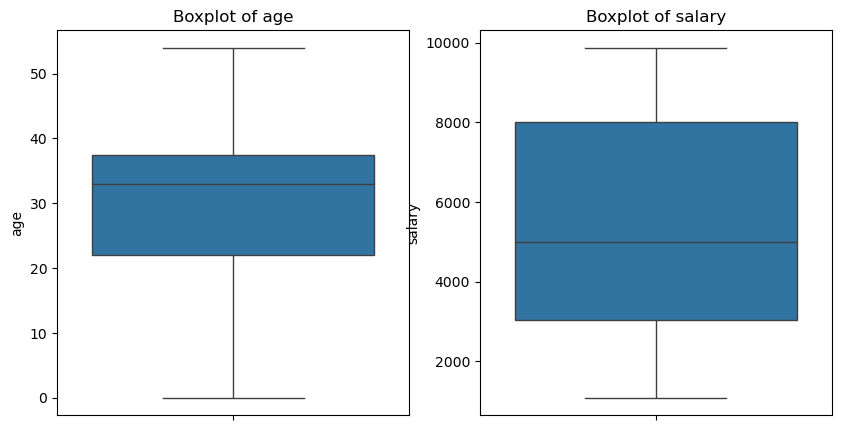

Outlier Counts:
age       0
salary    0
dtype: int64


In [23]:
# Plot boxplots to visualize outliers in numerical columns
numerical_cols = ["age", "salary"]

plt.figure(figsize=(10, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.show()

# Detect outliers using Interquartile Range (IQR)
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound))
print("Outlier Counts:")
print(outliers.sum())


In [24]:
# Replace age = 0 with NaN
df["age"] = df["age"].replace(0, np.nan)

# Check if age = 0 values are replaced
print("Missing Values After Replacing Age 0:")
print(df["age"].isnull().sum())


Missing Values After Replacing Age 0:
23


In [25]:
# Fill missing values in numerical columns with median
df["age"].fillna(df["age"].median(), inplace=True)
df["salary"].fillna(df["salary"].median(), inplace=True)

# Fill missing values in categorical columns with mode
df["company"].fillna(df["company"].mode()[0], inplace=True)
df["place"].fillna(df["place"].mode()[0], inplace=True)

# Confirm missing values are handled
print("Missing Values After Treatment:")
print(df.isnull().sum())


Missing Values After Treatment:
company    0
age        0
salary     0
place      0
country    0
gender     0
dtype: int64


C:\Users\amrut\AppData\Local\Temp\ipykernel_27172\3844353756.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True)
C:\Users\amrut\AppData\Local\Temp\ipykernel_27172\3844353756.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [28]:
df.head()

,company,age,salary,place,country,gender
0,TCS,20.0,5000.0,Chennai,India,0
1,Infosys,30.0,5000.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


## Exercise 3

In [29]:
# Filter the dataset where age > 40 and salary < 5000
filtered_df = df[(df["age"] > 40) & (df["salary"] < 5000)]

# Display the filtered data
print("Filtered Data (Age > 40 & Salary < 5000):")
print(filtered_df)


Filtered Data (Age > 40 & Salary < 5000):
     company   age  salary      place country  gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


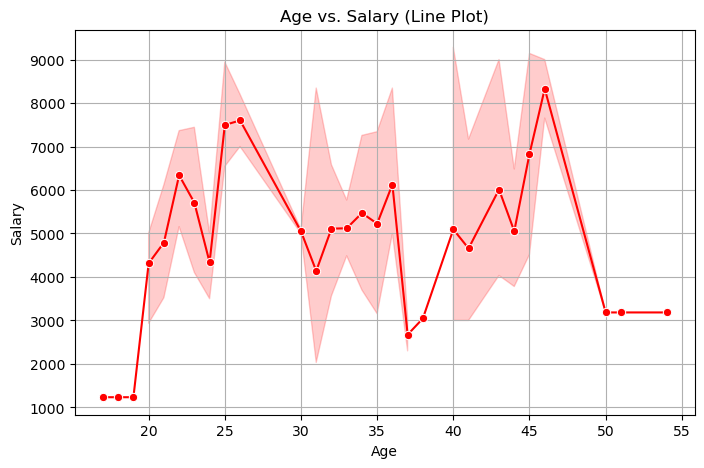

In [34]:
# Line plot of Age vs. Salary
# Sort data by age to make the line plot more meaningful
df_sorted = df.sort_values(by="age")

plt.figure(figsize=(8, 5))
sns.lineplot(x=df_sorted["age"], y=df_sorted["salary"], marker="o", color="red")

plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs. Salary (Line Plot)")
plt.grid(True)

plt.show()


C:\Users\amrut\AppData\Local\Temp\ipykernel_27172\2299774541.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=place_counts.index, y=place_counts.values, palette="viridis")


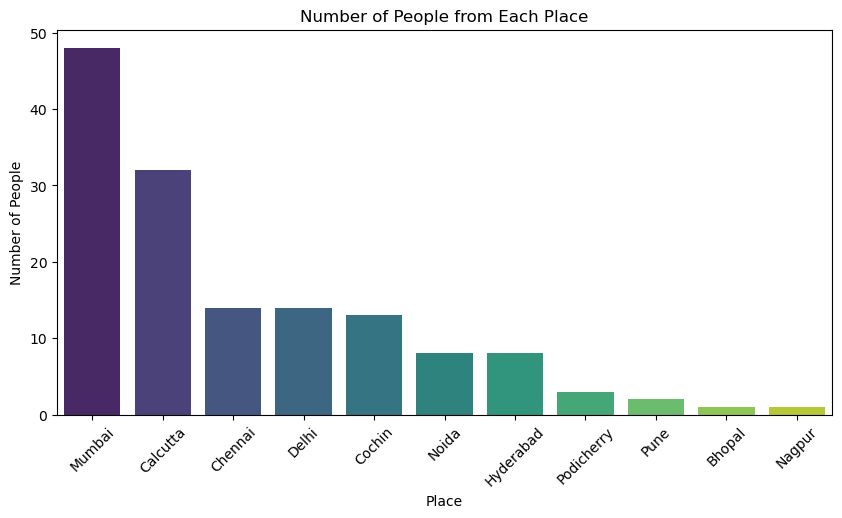

In [32]:
# Count number of people in each place
place_counts = df["place"].value_counts()

# Bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=place_counts.index, y=place_counts.values, palette="viridis")
plt.xlabel("Place")
plt.ylabel("Number of People")
plt.title("Number of People from Each Place")
plt.xticks(rotation=45)  
plt.show()


## Exercise 4

In [35]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)


Categorical Columns: Index(['company', 'place', 'country'], dtype='object')


In [47]:
# Label encode Gender (assuming values are 'Male - 0' and 'Female - 1')
label_encoder = LabelEncoder()
df["gender"] = label_encoder.fit_transform(df["gender"])

print(df[["gender"]].head())


   gender
0       0
1       0
2       0
3       0
4       0


In [54]:
# One-Hot Encoding for 'company' and 'place' without modifying the original df
df_encoded = df.copy()  # Create a copy of the original dataset

# Apply One-Hot Encoding separately
df_company = pd.get_dummies(df_encoded['company'], prefix="company")
df_place = pd.get_dummies(df_encoded['place'], prefix="place")

# Combine encoded columns into a new DataFrame (without modifying df)
df_encoded = pd.concat([df_encoded, df_company, df_place], axis=1)

# Display only the encoded data (excluding original categorical columns)
df_one_hot = df_encoded.drop(columns=['company', 'place'])  # Drop only from encoded version

# Show the first few rows of the one-hot encoded data
print(df_one_hot.head())


    age  salary country  gender  company_Congnizant  company_Infosys  \
0  20.0  5000.0   India       0               False            False   
1  30.0  5000.0   India       0               False             True   
2  35.0  2300.0   India       0               False            False   
3  40.0  3000.0   India       0               False             True   
4  23.0  4000.0   India       0               False            False   

   company_Infosys Pvt Lmt  company_TCS  company_Tata Consultancy Services  \
0                    False         True                              False   
1                    False        False                              False   
2                    False         True                              False   
3                    False        False                              False   
4                    False         True                              False   

   place_Calcutta  ...  place_Calcutta  place_Chennai  place_Cochin  \
0           False  ...     

## Exercise 5

In [55]:
df_standardized = df.copy()
df_minmax_scaled = df.copy()

In [57]:
# Select numerical features (excluding categorical variables)
num_cols = ['age', 'salary']

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply StandardScaler (Z-score normalization)
df_standardized[num_cols] = standard_scaler.fit_transform(df_standardized[num_cols])

# Apply MinMaxScaler (scales values between 0 and 1)
df_minmax_scaled[num_cols] = minmax_scaler.fit_transform(df_minmax_scaled[num_cols])


In [58]:
print("Standard Scaled Data (Z-score normalization):")
print(df_standardized.head())

print("\nMin-Max Scaled Data (0 to 1 scaling):")
print(df_minmax_scaled.head())


Standard Scaled Data (Z-score normalization):
        age    salary country  gender  company_Congnizant  company_Infosys  \
0 -1.484676 -0.100827   India       0               False            False   
1 -0.267174 -0.100827   India       0               False             True   
2  0.341577 -1.243735   India       0               False            False   
3  0.950328 -0.947426   India       0               False             True   
4 -1.119426 -0.524127   India       0               False            False   

   company_Infosys Pvt Lmt  company_TCS  company_Tata Consultancy Services  \
0                    False         True                              False   
1                    False        False                              False   
2                    False         True                              False   
3                    False        False                              False   
4                    False         True                              False   

   place_Calcutt